# 01. Parse Historical Finance Data with Beatifulsoup

In [1]:
from financeDataParser import FinanceDataParser

[related-code](https://github.com/jhyun0919/skku_python_proj/blob/master/codes/financeDataParser.py)

In [2]:
parser = FinanceDataParser()

In [3]:
quotes = parser.quotes_historical_finance(start_date='2016.01.01')

1.	fetching quote history for "두산"
2.	fetching quote history for "기아차"
3.	fetching quote history for "sk하이닉스"
4.	fetching quote history for "한화"
5.	fetching quote history for "CJ"
6.	fetching quote history for "현대제철"
7.	fetching quote history for "신세계"
8.	fetching quote history for "효성"
9.	fetching quote history for "현대차"
10.	fetching quote history for "posco"
11.	fetching quote history for "삼성전자"
12.	fetching quote history for "오뚜기"
13.	fetching quote history for "호텔신라"
14.	fetching quote history for "한화테크윈"
15.	fetching quote history for "한국전력"
16.	fetching quote history for "SKT"
17.	fetching quote history for "기업은행"
18.	fetching quote history for "삼성엔지니어"
19.	fetching quote history for "삼성카드"
20.	fetching quote history for "KT"
21.	fetching quote history for "한글과컴퓨터"
22.	fetching quote history for "lg유플러스"
23.	fetching quote history for "SK"
24.	fetching quote history for "네이버"
25.	fetching quote history for "카카오"
26.	fetching quote history for "JYP엔터"
27.	fetching quote history fo

---

# 02. Show Historical Finance Data

In [4]:
from dataDecorator import DataDecorator

[related-code](https://github.com/jhyun0919/skku_python_proj/blob/master/codes/dataDecorator.py)

- idx 말고 기업 이름으로 넣어서 검색되도록 바꿀 것

### 02_01. pandas dataframe

In [5]:
i = 1

df = DataDecorator.set_dataframe(idx=i, quotes=quotes)

In [6]:
df.head()

,close_prices,open_prices,high_prices,low_prices,volume
market_dates,,,,,
2016-01-04,50800.0,51700.0,51800.0,50600.0,1016680.0
2016-01-05,50700.0,50100.0,51300.0,50000.0,989919.0
2016-01-06,49400.0,50300.0,51100.0,49100.0,1571397.0
2016-01-07,49300.0,49250.0,50400.0,49200.0,764448.0
2016-01-08,48500.0,48350.0,49200.0,47800.0,1129958.0


In [7]:
df.tail()

,close_prices,open_prices,high_prices,low_prices,volume
market_dates,,,,,
2017-11-03,35250.0,35200.0,35800.0,35150.0,863081.0
2017-11-06,34900.0,35250.0,35400.0,34650.0,841321.0
2017-11-07,34750.0,34800.0,35150.0,34300.0,834358.0
2017-11-08,34500.0,34350.0,35100.0,34300.0,695973.0
2017-11-09,35000.0,34500.0,35050.0,34450.0,840875.0


### 02_02. plotly candlestick-graph

In [8]:
from plotly.offline import download_plotlyjs, init_notebook_mode
import plotly.plotly as py

init_notebook_mode(connected=True)
fig = DataDecorator.set_candelstick_data(df=df)
py.iplot(fig, filename='simple_candlestick')

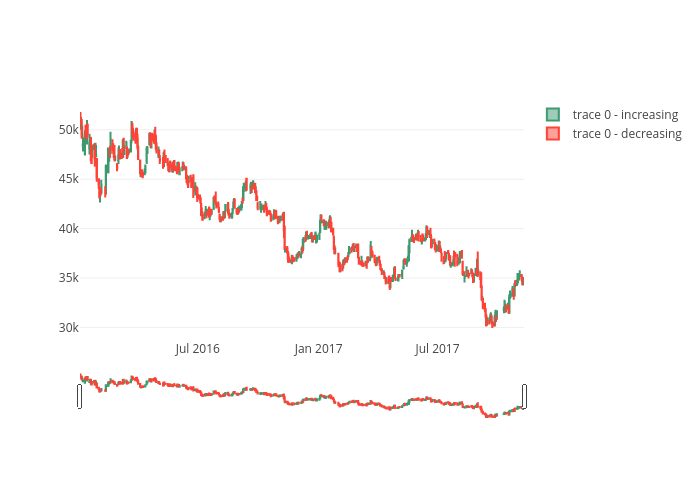

In [35]:
py.image.save_as(fig, filename='candlestick.png')
from IPython.display import Image
Image('candlestick.png', width=1300, height=900)

---

# 03. Clustering

In [10]:
from cluster import Cluster

[related-code](https://github.com/jhyun0919/skku_python_proj/blob/master/codes/cluster.py)

In [11]:
edge_model, embedding, names, n_labels, labels = Cluster.affinity(quotes=quotes)

Cluster 1: 기아차, 현대차
Cluster 2: sk하이닉스, 삼성전자, 카카오, JYP엔터
Cluster 3: CJ, posco, 오뚜기, 한글과컴퓨터, SM엔터, 메디톡스, CJ제일제당
Cluster 4: 두산, 한화, 현대제철, 효성, 한국가스공사, lg전자
Cluster 5: 신세계, 호텔신라, 한화테크윈, 현대백화점, 하이마트, 이마트
Cluster 6: SKT, KT, lg유플러스, SK
Cluster 7: 삼성엔지니어
Cluster 8: 네이버, ncsoft, 코미팜
Cluster 9: 한국한공우주, 셀트리온, 셀트리온제약
Cluster 10: 한국전력, 기업은행, 삼성카드, 신한지주, KB금융


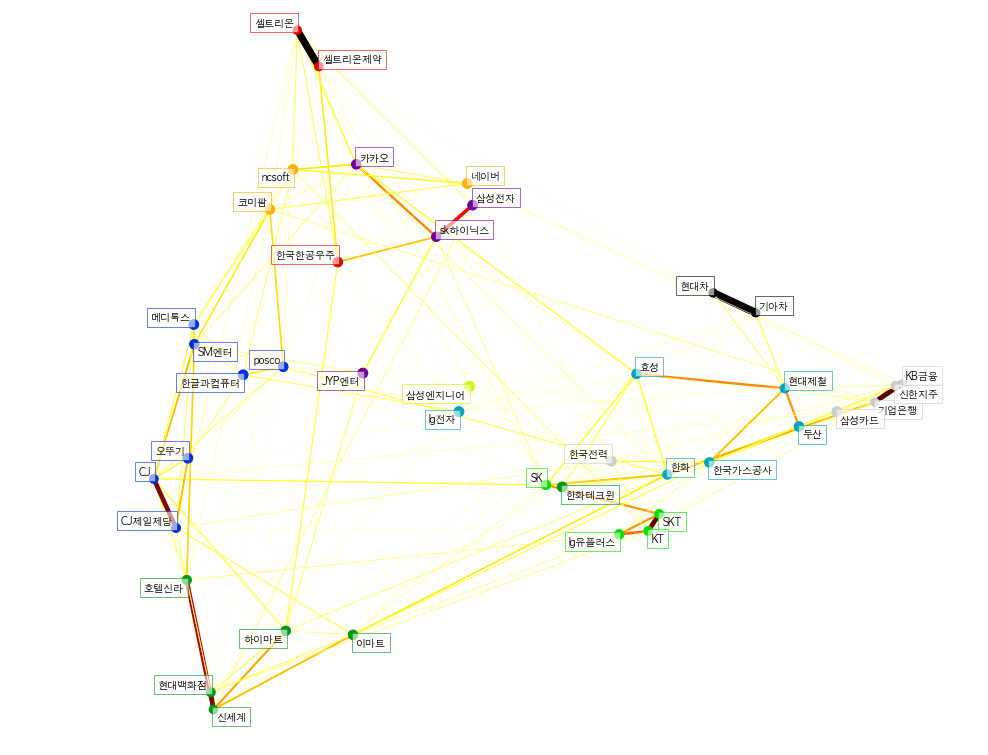

In [12]:
DataDecorator.show_cluster(edge_model, embedding, names, n_labels, labels)

---

# 04. Reference
* [NAVER를 통한 주식정보 크롤링 by Jaeyeon Baek](http://estenpark.tistory.com/353)
* [Visualizing the Stock Market Structure](http://scikit-learn.org/stable/auto_examples/applications/plot_stock_market.html)
* [plotly : Candlestick-Chart](https://plot.ly/python/candlestick-charts/)